# Практикум с tensorflow serfing. Данный пример создан для локальной машины.
Как запустить это с колаба - https://colab.research.google.com/drive/1a6Azpl_rg4hEvBDZ21sftTEovkyUfjxB?usp=sharing

In [1]:
MODEL_DIR = './content/tmp'                             # Путь к директории для хранения моделей

In [24]:
import tensorflow as tf                                     # Библиотека tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np                                          # Работа с массивами
import matplotlib.pyplot as plt                             # Отрисовка изображений
import os                                                   # Модуль для работы с операционной системой
import random    

In [25]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [26]:
# Нормализация данных
train_images, test_images = train_images / 255.0, test_images / 255.0

# Создаем и обучаем нейронную сеть для классификации изображений из базы CIFAR10. Сохраняем модель в формате SavedModel.
на качество предсказания не обращаем внимание, задача не в этом

In [27]:
# Определение нейронной сети
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

2023-03-11 19:43:42.608153: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-11 19:43:42.608190: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-03-11 19:43:42.608787: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Обучение модели
history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))


Epoch 1/2


2023-03-11 19:44:55.900755: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1560/1563 [============================>.] - ETA: 0s - loss: 1.5180 - accuracy: 0.4457

2023-03-11 19:45:13.743983: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 [==============================] - 19s 11ms/step - loss: 1.5176 - accuracy: 0.4458 - val_loss: 1.2188 - val_accuracy: 0.5623
Epoch 2/2
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1493 - accuracy: 0.5943 - val_loss: 1.0962 - val_accuracy: 0.6176


# Сохраняем модель и примеры для предстазания

## Сохранение модели

In [ ]:
version = 1                                            # Номер версии модели
export_path = os.path.join(MODEL_DIR, str(version))    # Путь к директории для хранения модели с заданной версией
print('Путь для экспорта: {}'.format(export_path))
# Сохранение модели в формате SavedModel
tf.keras.models.save_model(model,                   # Передаем модель, которую нужно сохранить
                           export_path,             # Путь для сохранения
                           overwrite=True,          # Аргумент, отвечающий за перезапись модели по указанному пути
                           include_optimizer=True,  # Также сохраняем состояние оптимизатора модели (это может понадобится, например, для дообучения модели внутри TensorFlow Serving)
                           save_format=None,        # Аргумент, указывающий следует ли сохранять модель в SavedModel или HDF5 (по умолчанию это SavedModel)
                           signatures=None,         # Настройка того как передаются данные в модель и что модель возвращает (в случае None применяется стандартная сигнатура: один вход и один выход у модели)
                           options=None)            # Дополнительные параметры для сохранения в SavedModel

In [114]:
#здесь получаем информацию о модели и о конфликте с GPU
!saved_model_cli show --dir {export_path} --all

2023-03-11 20:45:07.010104: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 20:45:07.100137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-11 20:45:07.100159: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-11 20:45:07.723106: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Сохранение тестового примера

(5, 32, 32, 3)

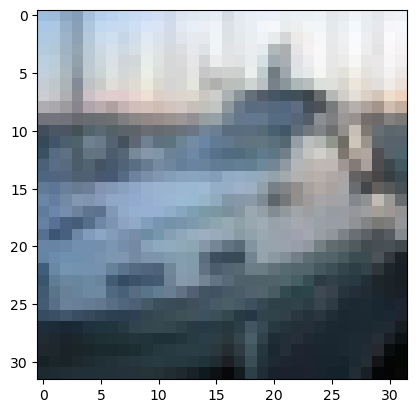

In [33]:
# Первый вариант, через numpy
np.save('test_sample.npy', test_images[:5], )
sample = np.load('test_sample.npy')
plt.imshow(sample[2])
sample.shape

In [48]:
# второй вариант, через json
import json # Модуль для кодирования и декодирования данных в формате json

data = json.dumps({"signature_name": "serving_default", "instances": test_images[:5].tolist()}) # Передаем три изображения для записи в формат JSON
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))
json_file = open('predict.json', 'w') # Создаем файл в формате JSON и открываем его для записи
json_file.write(data)                 # Записываем данные
json_file.close()                     # Закрываем файл

Data: {"signature_name": "serving_default", "instances": ... 43137255, 0.611764705882353, 0.4588235294117647]]]]}


# Скачиваем образ TensorFlow Serving и запускае Docker

скачиваем образ

In [115]:
!docker pull tensorflow/serving
#следующие команды пока выполняем териминал. Внутри jupyterа сложнее отладка

Using default tag: latest
Error response from daemon: Head "https://registry-1.docker.io/v2/tensorflow/serving/manifests/latest": Get "https://auth.docker.io/token?scope=repository%3Atensorflow%2Fserving%3Apull&service=registry.docker.io": net/http: request canceled while waiting for connection (Client.Timeout exceeded while awaiting headers)


с командной строки запускаем контейнер docker_run_comand, ниже доп. команты для перезапуска\n

может возникнуть проблема с --mount

In [13]:
name_of_container = 'tf_serving_cifar10'
port = '8501:8501'
source = '/home/nikmih/Jupyter_projects/tensorflow_serving/content/tmp/'
target = '/models/cifar10_model/'
model_name = 'cifar10_model'
container_name = 'cifar10_container'

docker_run_comand = f'docker run -p {port} --name {container_name} --mount type=bind,source={source},target={target} \
-e MODEL_NAME={model_name} -t tensorflow/serving'
print(docker_run_comand)


'''
#containes list
docker sm
# docker stop container
docker stop 70f91474afac
# удалить контейнер
docker rm 
'''




docker run -p 8501:8501 --name cifar10_container --mount type=bind,source=/home/nikmih/Jupyter_projects/tensorflow_serving/content/tmp/,target=/models/cifar10_model/ -e MODEL_NAME=cifar10_model -t tensorflow/serving


'\n#containes list\ndocker sm\n# docker stop container\ndocker stop 70f91474afac\n# удалить контейнер\ndocker rm \n'

# Отправим тестовые примеры на сервер.

## Подготовка данных для ПОСТ запроса
Дубль из пункта 2.2

In [84]:
import json # Модуль для кодирования и декодирования данных в формате json
data = json.dumps({"signature_name": "serving_default", "instances": test_images[:3].tolist()}) # Передаем три изображения для записи в формат JSON
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))
with open('predict.json', 'w') as json_file:# Создаем файл в формате JSON и открываем его для записи
    json_file.write(data)                 # Записываем данные
# json_file.close()                     # Закрываем файл

Data: {"signature_name": "serving_default", "instances": ... 6862, 0.03137254901960784, 0.027450980392156862]]]]}


## Отправка запроса и получение результата
Далее воспользуемся утилитой curl для отправки запроса. Здесь нам также потребуется передать несколько аргументов:

### Отправка запроса через терминал
через аргумент -X указываем тип нашего запроса – POST

через аргумент -H указываем тип данных, которые будем отправлять

через аргумент -d передаем путь к самим данным.

In [86]:
json_path = '/home/nikmih/Jupyter_projects/tensorflow_serving/predict.json'
port = '8501'
curl_command = f'curl -X POST -H "Content-Type: application/json" -d @{json_path} \
http://localhost:{port}/v1/{target[1:-1]}:predict'

print(curl_command)


curl -X POST -H "Content-Type: application/json" -d @/home/nikmih/Jupyter_projects/tensorflow_serving/predict.json http://localhost:8501/v1/models/cifar10_model:predict


В конце запроса можем добавить >> response.json, тогда файл будет передан в текущую папку терминала, от куда был вызван терминал

осталось распарсить и визуализировать

### попробуем отправить запрос с помошью request

In [88]:
import requests # Модуль для составления HTTP-запросов

headers = {"content-type": "application/json"} # Указываем, что будем отправлять данные в формате JSON
 
json_response = requests.post('http://localhost:8501/v1/models/cifar10_model:predict', data=data, headers=headers)
json_response.__dict__

{'_content': b'{\n    "predictions": [[-1.47531021, -5.21711349, -1.18303502, 3.12796545, -2.5124135, 2.042027, -0.345840096, -2.34317756, 0.510801673, -1.76002944], [3.58673334, 6.997612, -4.78423166, -6.91376543, -11.0340223, -12.699235, -4.07094622, -11.6636553, 7.71099949, 2.58568215], [3.32866192, 0.676783085, -2.88740468, -3.07508922, -4.43050194, -4.92588329, -2.64804268, -5.31284857, 5.30123663, 0.2614685]\n    ]\n}',
 '_content_consumed': True,
 '_next': None,
 'status_code': 200,
 'headers': {'Content-Type': 'application/json', 'Date': 'Sat, 11 Mar 2023 15:12:27 GMT', 'Content-Length': '409'},
 'raw': <urllib3.response.HTTPResponse at 0x7f79dd31d7f0>,
 'url': 'http://localhost:8501/v1/models/cifar10_model:predict',
 'encoding': 'utf-8',
 'history': [],
 'reason': 'OK',
 'cookies': <RequestsCookieJar[]>,
 'elapsed': datetime.timedelta(microseconds=8164),
 'request': <PreparedRequest [POST]>,
 'connection': <requests.adapters.HTTPAdapter at 0x7f7a53ae99a0>}

In [112]:
ansver = [class_names[x] for x in [np.argmax(x) for x in json.loads(json_response.text)['predictions']]]

### Сюда добавить визуализацию.

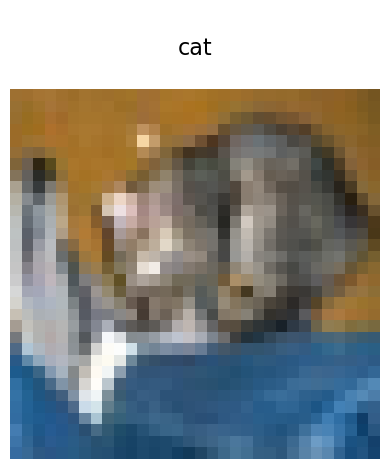

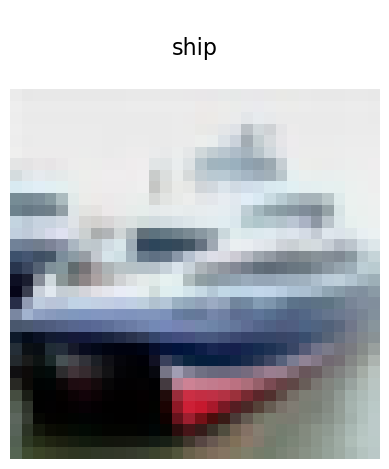

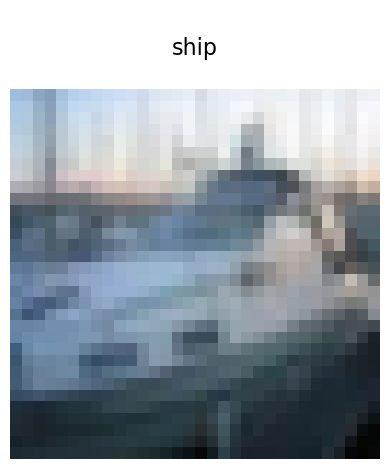

In [113]:
# Функция для просмотра картинки из тестового набора данных
def show(idx, title):
    """
    idx   - индекс случайного изображения
    title - заголовок (метка класса)
    """

    plt.figure()
    plt.imshow(test_images[idx].reshape(32,32,3), cmap='gray')
    plt.axis('off')
    plt.title('\n{}\n'.format(title), fontdict={'size': 16})

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'trank']

for i, x in enumerate (ansver):
    show(i, x)